In [1]:
import os
import sys

# Set project root (assumes notebook is in 'notebooks/' and project is one level up)
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
os.chdir(project_root)

# Add root to Python path for absolute imports like `env.trading_env`
if project_root not in sys.path:
    sys.path.append(project_root)

print("📁 Notebook directory:", notebook_dir)
print("✅ Project root set to:", project_root)


📁 Notebook directory: /home/jovyan/work/notebooks
✅ Project root set to: /home/jovyan/work


In [2]:
! pwd

/home/jovyan/work


In [3]:
## Install dependencies
! pip install -r requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
	
# Generate Training Data
! python data_gen/generate_data.py --tickers-file data_gen/tickers.txt --interval 5min --start 2022-01-01 --end 2023-02-01

Fetching NVDA from 2022-01-01 to 2023-02-01 (5 minute)...
Saved NVDA_5minute to data/NVDA_5minute.csv
Fetching NVDA from 2022-01-01 to 2023-02-01 (1 day)...
Saved NVDA_1day to data/NVDA_1day.csv
Fetching NVDA from 2022-01-01 to 2023-02-01 (1 week)...
Saved NVDA_1week to data/NVDA_1week.csv
Fetching AAPL from 2022-01-01 to 2023-02-01 (5 minute)...
Saved AAPL_5minute to data/AAPL_5minute.csv
Fetching AAPL from 2022-01-01 to 2023-02-01 (1 day)...
Saved AAPL_1day to data/AAPL_1day.csv
Fetching AAPL from 2022-01-01 to 2023-02-01 (1 week)...
Saved AAPL_1week to data/AAPL_1week.csv
Fetching MSFT from 2022-01-01 to 2023-02-01 (5 minute)...
Saved MSFT_5minute to data/MSFT_5minute.csv
Fetching MSFT from 2022-01-01 to 2023-02-01 (1 day)...
Saved MSFT_1day to data/MSFT_1day.csv
Fetching MSFT from 2022-01-01 to 2023-02-01 (1 week)...
Saved MSFT_1week to data/MSFT_1week.csv
Fetching AMZN from 2022-01-01 to 2023-02-01 (5 minute)...
Saved AMZN_5minute to data/AMZN_5minute.csv
Fetching AMZN from 2022-0

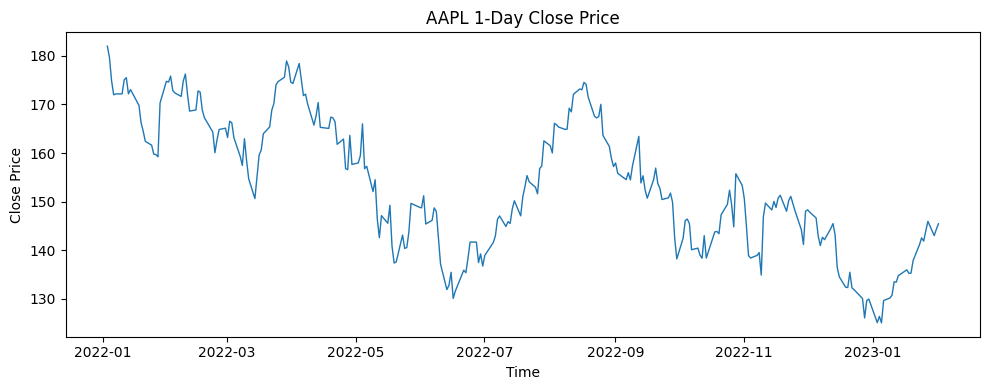

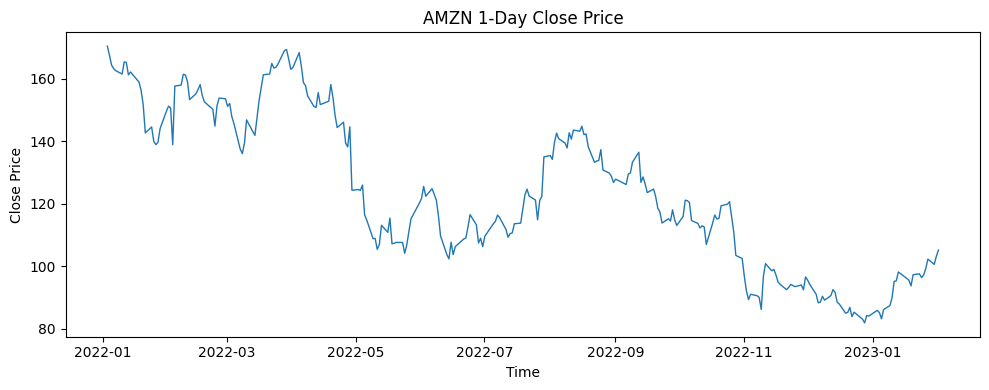

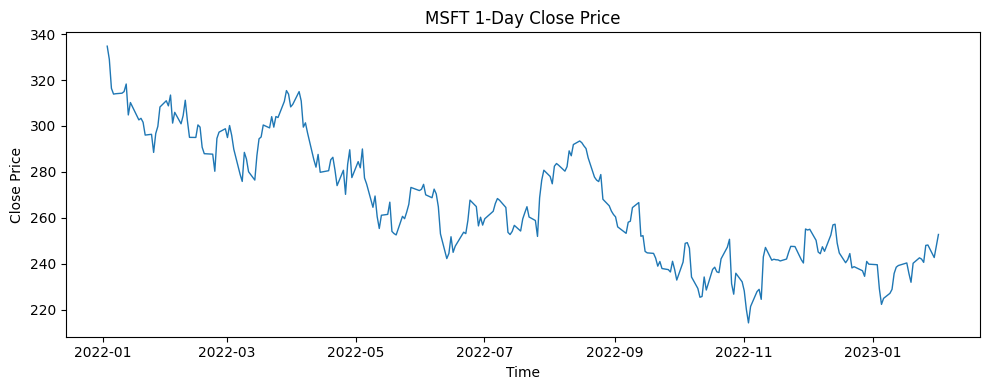

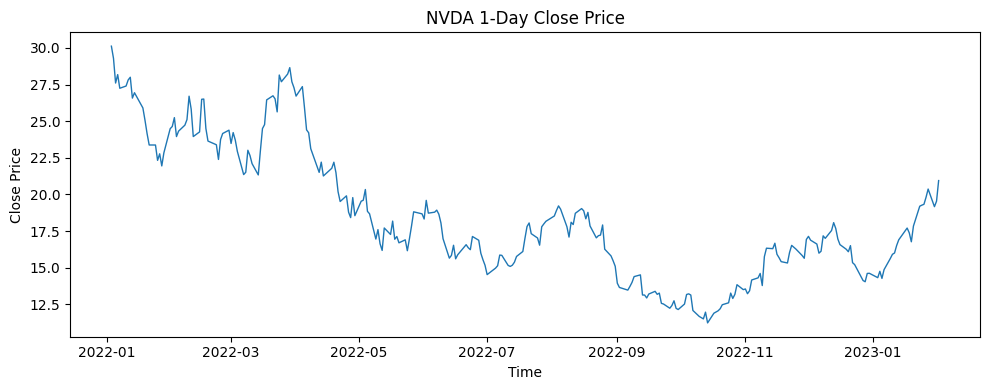

In [5]:
# ─── Plot all 1day CSVs in data/ ─────────────────────────────────────────
import glob
import pandas as pd
import matplotlib.pyplot as plt

# 1. Grab every CSV matching *_1day.csv
csv_files = glob.glob("data/*_1day.csv")
if not csv_files:
    raise FileNotFoundError("No files found: data/*_1day.csv")

# 2. Loop and plot
for file_path in sorted(csv_files):
    # Load and parse time
    df = pd.read_csv(file_path, parse_dates=[0])
    df.set_index(df.columns[0], inplace=True)

    # Extract ticker from filename
    ticker = file_path.split("/")[-1].split("_")[0]

    # Create the figure
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["close"], linewidth=1)
    plt.title(f"{ticker} 1-Day Close Price")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.tight_layout()
    plt.show()

In [8]:
# Run PPO training using files in `data/` directory
%run train/train_ppo.py

[Train] Using MSFT_5minute.csv for MSFT


TypeError: TradingEnv.__init__() got an unexpected keyword argument 'df'